In [9]:
import os
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import nltk

# Ensure you have the necessary nltk data
nltk.download('punkt')

# Define paths
project_folder = './'  # Modify this if your project folder is located elsewhere
idioms_file_path = os.path.join(project_folder, 'idioms.txt')
files_text_folder = os.path.join(project_folder, 'Files_Text')

# Function to read file
def read_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read().strip()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

# Read and vectorize idioms.txt
idioms_text = read_file(idioms_file_path)

if not idioms_text:
    raise ValueError(f"No valid content in {idioms_file_path}.")

# Tokenization and vectorization
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words='english')
idioms_vector = vectorizer.fit_transform([idioms_text])

print("Idioms Vectorized:")
print(idioms_vector)

# Tokenize all files in Files_Text folder
def tokenize_text(text):
    return word_tokenize(text)

# Read and tokenize files in Files_Text
files_text_files = glob.glob(os.path.join(files_text_folder, '*.txt'))
tokenized_texts = {}
for file_path in files_text_files:
    file_content = read_file(file_path)
    if file_content:
        tokenized_texts[file_path] = tokenize_text(file_content)
        print(f"Tokenized {file_path} with {len(tokenized_texts[file_path])} tokens.")
    else:
        print(f"Skipped empty file: {file_path}")

# Output tokenized results (stored in the dictionary tokenized_texts)
for file_path, tokens in tokenized_texts.items():
    print(f"\nFile: {file_path}")
    print(f"Tokens: {tokens[:10]}...")  # Printing only the first 10 tokens for brevity

# If you need the complete token list, you can store or process `tokenized_texts` further


Idioms Vectorized:
  (0, 406)	0.007876702166955815
  (0, 137)	0.005251134777970542
  (0, 678)	0.002625567388985271
  (0, 654)	0.007876702166955815
  (0, 604)	0.005251134777970542
  (0, 748)	0.002625567388985271
  (0, 133)	0.002625567388985271
  (0, 207)	0.002625567388985271
  (0, 614)	0.002625567388985271
  (0, 198)	0.005251134777970542
  (0, 579)	0.007876702166955815
  (0, 740)	0.002625567388985271
  (0, 324)	0.002625567388985271
  (0, 68)	0.01575340433391163
  (0, 112)	0.002625567388985271
  (0, 215)	0.007876702166955815
  (0, 812)	0.005251134777970542
  (0, 235)	0.013127836944926356
  (0, 204)	0.002625567388985271
  (0, 25)	0.010502269555941085
  (0, 438)	0.013127836944926356
  (0, 478)	0.005251134777970542
  (0, 103)	0.002625567388985271
  (0, 485)	0.002625567388985271
  (0, 161)	0.007876702166955815
  :	:
  (0, 175)	0.002625567388985271
  (0, 582)	0.002625567388985271
  (0, 620)	0.002625567388985271
  (0, 40)	0.002625567388985271
  (0, 650)	0.002625567388985271
  (0, 405)	0.002625

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ih8l1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
import os
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
import nltk

# Ensure you have the necessary nltk data
nltk.download('punkt')

# Define paths
project_folder = './'  # Modify this if your project folder is located elsewhere
idioms_file_path = os.path.join(project_folder, 'idioms.txt')
text_files_folder = os.path.join(project_folder, 'Text_Files')

# Function to read file
def read_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read().strip()
            print(f"Read {len(content)} characters from {file_path}")
            return content
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

# Read idioms.txt and extract idioms
idioms_text = read_file(idioms_file_path)
idioms = [line.strip() for line in idioms_text.splitlines() if line.strip()]

if not idioms:
    raise ValueError(f"No valid content in {idioms_file_path}.")

print(f"Extracted {len(idioms)} idioms.")

# Tokenization
def tokenize_text(text):
    return word_tokenize(text.lower())  # Lowercase for case-insensitive matching

# Read and tokenize files in Text_Files
text_files_paths = glob.glob(os.path.join(text_files_folder, '*.txt'))
print(f"Found {len(text_files_paths)} files in {text_files_folder}.")
file_contents = [read_file(file_path) for file_path in text_files_paths]

# Filter out empty texts
file_contents = [text for text in file_contents if text]
text_files_paths = [file_path for file_path, text in zip(text_files_paths, file_contents) if text]

if not text_files_paths:
    raise ValueError("No valid content in Text_Files.")

# Check for exact matches and calculate similarities
results = {}
for file_path, content in zip(text_files_paths, file_contents):
    tokens = tokenize_text(content)
    matching_idioms = [idiom for idiom in idioms if idiom.lower() in content.lower()]
    if matching_idioms:
        results[file_path] = matching_idioms
    else:
        results[file_path] = "No exact idiom matches."

# Output the results of exact matches
print("\nExact Matches:")
for file_path, matches in results.items():
    print(f"\nFile: {file_path}")
    if isinstance(matches, list):
        print(f"  Matching Idioms: {matches}")
    else:
        print(f"  {matches}")

# Vectorization for similarity check (optional)
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words='english', lowercase=True, ngram_range=(1, 2))
all_texts = idioms + file_contents
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Separate idioms vectors and text file vectors
idioms_vectors = tfidf_matrix[:len(idioms)]
text_files_vectors = tfidf_matrix[len(idioms):]

# Calculate similarities
similarities = cosine_similarity(text_files_vectors, idioms_vectors)

# Output the similarity results
similarity_threshold = 0.1  # Set a threshold for remote similarity
print("\nSimilarity Results:")
for idx, file_path in enumerate(text_files_paths):
    similar_idioms = [idioms[j] for j in range(len(idioms)) if similarities[idx][j] >= similarity_threshold]
    if similar_idioms:
        print(f"\nFile: {file_path}")
        print(f"  Similar Idioms (threshold {similarity_threshold}): {similar_idioms}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ih8l1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Read 12125 characters from ./idioms.txt
Extracted 717 idioms.
Found 83 files in ./Text_Files.
Read 83528 characters from ./Text_Files\fomcminutes20140129.txt
Read 88557 characters from ./Text_Files\fomcminutes20140319.txt
Read 47125 characters from ./Text_Files\fomcminutes20140430.txt
Read 92817 characters from ./Text_Files\fomcminutes20140618.txt
Read 55607 characters from ./Text_Files\fomcminutes20140730.txt
Read 99528 characters from ./Text_Files\fomcminutes20140917.txt
Read 58231 characters from ./Text_Files\fomcminutes20141029.txt
Read 89187 characters from ./Text_Files\fomcminutes20141217.txt
Read 101017 characters from ./Text_Files\fomcminutes20150128.txt
Read 93324 characters from ./Text_Files\fomcminutes20150318.txt
Read 53467 characters from ./Text_Files\fomcminutes20150429.txt
Read 91098 characters from ./Text_Files\fomcminutes20150617.txt
Read 59250 characters from ./Text_Files\fomcminutes20150729.txt
Read 89178 characters from ./Text_Files\fomcminutes20150917.txt
Read 5711

c:\Users\ih8l1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Similarity Results:

File: ./Text_Files\fomcminutes20220921.txt
  Similar Idioms (threshold 0.1): ['across the board', 'get on board']

File: ./Text_Files\fomcminutes20221214.txt
  Similar Idioms (threshold 0.1): ['across the board', 'get on board']

File: ./Text_Files\fomcminutes20230201.txt
  Similar Idioms (threshold 0.1): ['across the board', 'get on board']

File: ./Text_Files\fomcminutes20230322.txt
  Similar Idioms (threshold 0.1): ['across the board', 'get on board']

File: ./Text_Files\fomcminutes20230503.txt
  Similar Idioms (threshold 0.1): ['across the board', 'get on board']

File: ./Text_Files\fomcminutes20230614.txt
  Similar Idioms (threshold 0.1): ['across the board', 'get on board']

File: ./Text_Files\fomcminutes20230726.txt
  Similar Idioms (threshold 0.1): ['across the board', 'get on board']

File: ./Text_Files\fomcminutes20230920.txt
  Similar Idioms (threshold 0.1): ['across the board', 'get on board']

File: ./Text_Files\fomcminutes20231101.txt
  Similar Idiom

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ih8l1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Extracted 717 idioms.

Exact Matches:

File: ./Text_Files\fomcminutes20140129.txt
  Idiom: calendar year
    Found at: 8751 - Context: ne, one month earlier than in the March survey s.  The average probabilit
    Found at: 22888 - Context: is-match present in their funding vehicles .  However, the 
staff also no
    Found at: 29705 - Context: tight labor conditions, especially in the health  care and 
construction 
  Idiom: all set
    Found at: 9627 - Context: end reporting date, in line 
with recent history .  Market particip

File: ./Text_Files\fomcminutes20140319.txt
  Idiom: calendar year
    Found at: 65032 - Context: 
    Found at: 65464 - Context: 
    Found at: 75371 - Context: 
    Found at: 82215 - Context: 

File: ./Text_Files\fomcminutes20140430.txt
  No exact idiom matches.

File: ./Text_Files\fomcminutes20140618.txt
  Idiom: calendar year
    Found at: 67029 - Context: 
    Found at: 67458 - Context: 
    Found at: 77844 - Context: 
    Found at: 84244 - Context: 

File:

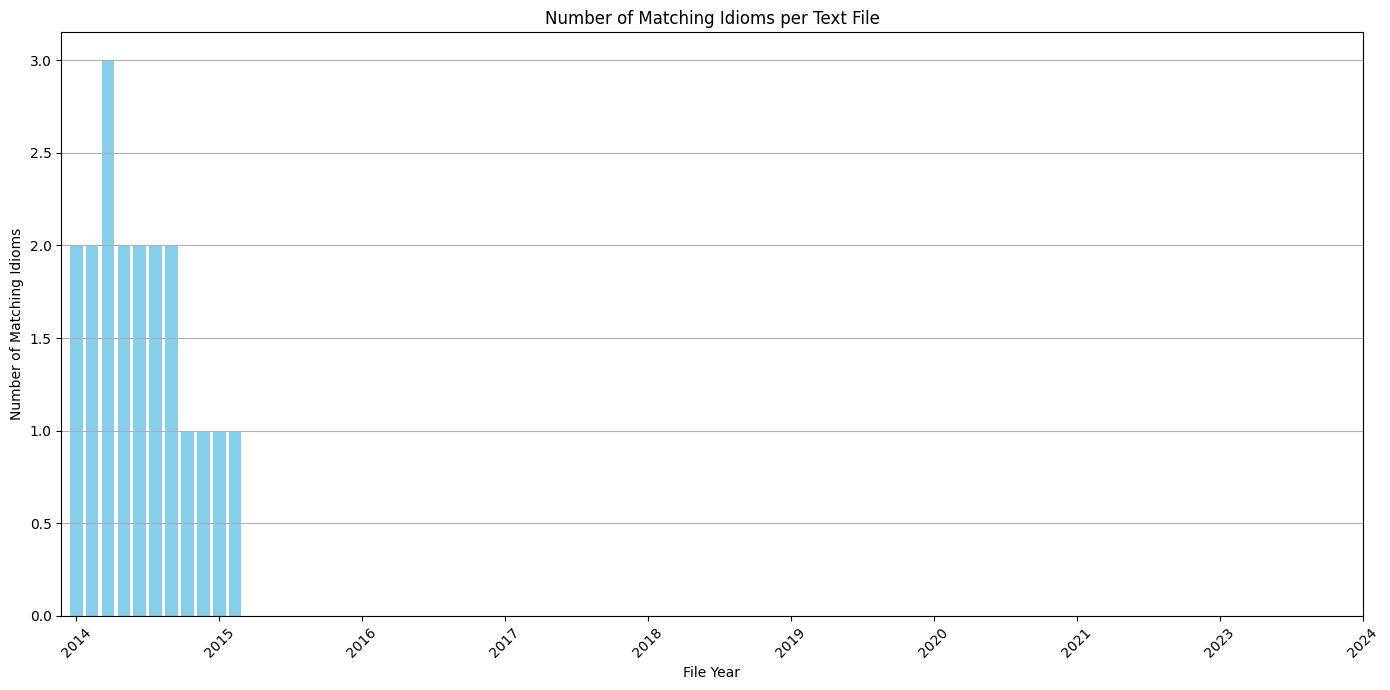

In [4]:
import os
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

# Ensure you have the necessary nltk data
nltk.download('punkt')

# Define paths
project_folder = './'  # Modify this if your project folder is located elsewhere
idioms_file_path = os.path.join(project_folder, 'idioms.txt')
text_files_folder = os.path.join(project_folder, 'Text_Files')

# Function to read file
def read_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read().strip()
            return content
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return ""

# Read idioms.txt and extract idioms
idioms_text = read_file(idioms_file_path)
idioms = [line.strip() for line in idioms_text.splitlines() if line.strip()]

if not idioms:
    raise ValueError(f"No valid content in {idioms_file_path}.")

print(f"Extracted {len(idioms)} idioms.")

# Tokenization
def tokenize_text(text):
    return word_tokenize(text.lower())  # Lowercase for case-insensitive matching

# Read and tokenize files in Text_Files
text_files_paths = glob.glob(os.path.join(text_files_folder, '*.txt'))
file_contents = [read_file(file_path) for file_path in text_files_paths]

# Filter out empty texts
file_contents = [text for text in file_contents if text]
text_files_paths = [file_path for file_path, text in zip(text_files_paths, file_contents) if text]

if not text_files_paths:
    raise ValueError("No valid content in Text_Files.")

# Check for exact matches
results = {}
all_matches = {}
for file_path, content in zip(text_files_paths, file_contents):
    matching_idioms = []
    for idiom in idioms:
        if idiom.lower() in content.lower():
            matches = []
            start = 0
            while (start := content.lower().find(idiom.lower(), start)) != -1:
                matches.append((start, start + len(idiom)))
                start += len(idiom)
            matching_idioms.append({'idiom': idiom, 'instances': matches})
    results[file_path] = len(matching_idioms)
    all_matches[file_path] = matching_idioms

# Output the results of exact matches
print("\nExact Matches:")
for file_path, matches in all_matches.items():
    print(f"\nFile: {file_path}")
    if matches:
        for match in matches:
            print(f"  Idiom: {match['idiom']}")
            for instance in match['instances']:
                start, end = instance
                print(f"    Found at: {start} - Context: {content[max(0, start-30):min(len(content), end+30)]}")
    else:
        print("  No exact idiom matches.")

# Extract simplified file names and counts
def simplify_name(name):
    # Extract the relevant part of the file name (e.g., year)
    return name[-12:-8] if len(name) >= 12 else name

simplified_names = [simplify_name(os.path.basename(path)) for path in text_files_paths]
idiom_counts = [results[path] for path in text_files_paths]

# Ensure data consistency
print("\nData Consistency Check:")
for name, count in zip(simplified_names, idiom_counts):
    print(f"File Year: {name}, Idiom Count: {count}")

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(simplified_names, idiom_counts, color='skyblue')

# Customize X-axis to show only every 9th label
plt.xticks(range(0, len(simplified_names), 9), [simplified_names[i] for i in range(0, len(simplified_names), 9)])

plt.xlabel('File Year')
plt.ylabel('Number of Matching Idioms')
plt.title('Number of Matching Idioms per Text File')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [6]:
## DELETE THE IMAGE AND SIMPLIFY
